In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-white')

## 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

### Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [2]:
np.random.seed(0)
c1 = np.append(np.random.normal(0, 0.01, (20, 50)), np.full((20, 1), 1), axis=1)
c2 = np.append(np.random.normal(0.3, 0.01, (20, 50)), np.full((20, 1), 2), axis=1)
c3 = np.append(np.random.normal(-0.3, 0.01, (20, 50)), np.full((20, 1), 3), axis=1)

df = pd.DataFrame(np.vstack((c1,c2,c3)))

In [3]:
print(df.head())

         0         1         2         3         4         5         6   \
0  0.017641  0.004002  0.009787  0.022409  0.018676 -0.009773  0.009501   
1 -0.008955  0.003869 -0.005108 -0.011806 -0.000282  0.004283  0.000665   
2  0.018832 -0.013478 -0.012705  0.009694 -0.011731  0.019436 -0.004136   
3 -0.000682  0.017133 -0.007448 -0.008264 -0.000985 -0.006635  0.011266   
4 -0.003692 -0.002394  0.010997  0.006553  0.006401 -0.016170 -0.000243   

         7         8         9   ...        41        42        43        44  \
0 -0.001514 -0.001032  0.004106  ... -0.014200 -0.017063  0.019508 -0.005097   
1  0.003025 -0.006343 -0.003627  ...  0.012224  0.002083  0.009766  0.003564   
2 -0.007475  0.019229  0.014805  ...  0.004394  0.001667  0.006350  0.023831   
3 -0.010799 -0.011475 -0.004378  ...  0.002671 -0.000393 -0.011681  0.005233   
4 -0.007380  0.002799 -0.000982  ... -0.003973 -0.001329 -0.002978 -0.003090   

         45        46        47        48        49   50  
0 -0.0043

In [20]:
print(df[:0,:])

KeyError: (slice(None, 0, None), slice(None, None, None))

### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.iloc[:,0:50])
df_pca = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])
df_pca['labels'] = df[[50]]
df_pca.labels = df_pca.labels.astype(int)

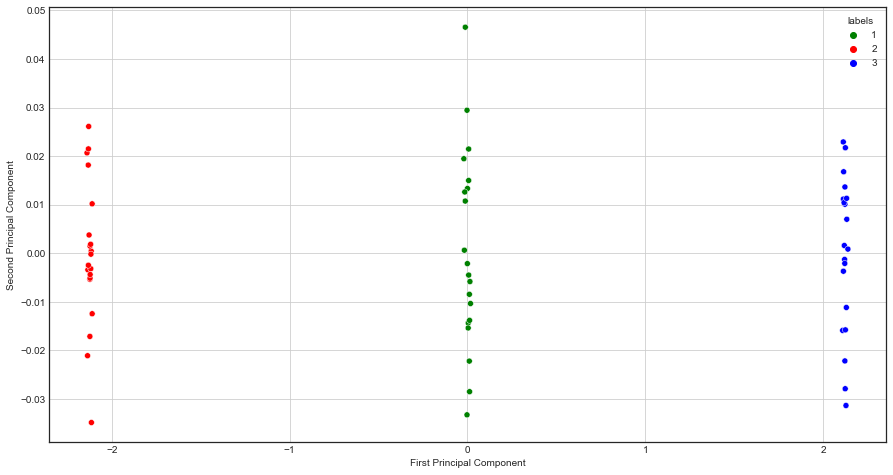

In [5]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x="PC1", y="PC2", hue="labels", palette={1:'green', 2:'red', 3:'blue'}, data=df_pca)
plt.grid()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [6]:
km = KMeans(n_clusters=3, n_init=50, random_state=0)
km.fit(df.iloc[:,:50])

KMeans(n_clusters=3, n_init=50, random_state=0)

In [7]:
print(km.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
pd.Series(km.labels_).value_counts()

0    20
1    20
2    20
dtype: int64

The labels are in sequential ordering, ensuring that the class labels are correctly classified.

### (d) Perform K-means clustering of the observations with K = 2. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [9]:
km2 = KMeans(n_clusters=2, n_init=50, random_state=0)
km2.fit(df.iloc[:,:50])

KMeans(n_clusters=2, n_init=50, random_state=0)

In [10]:
print(km2.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
pd.Series(km2.labels_).value_counts()

0    40
1    20
dtype: int64

KeyError: (slice(None, None, None), 0)

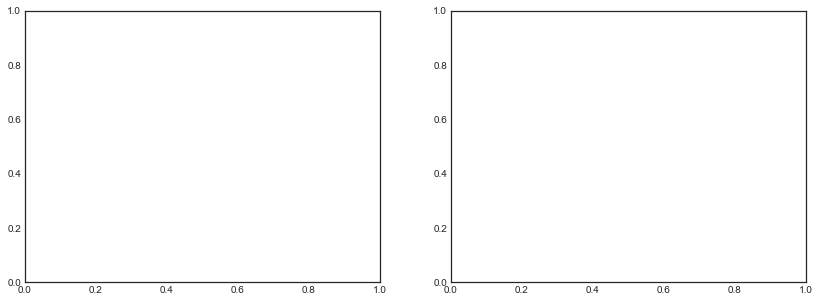

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(df[:,0], df[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(df[:,0], df[:,1], s=40, c=km.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### (e) Now perform K-means clustering with K = 4, and describe your results.


In [12]:
km4 = KMeans(n_clusters=4, n_init=50, random_state=0)
km4.fit(df.iloc[:,:50])

KMeans(n_clusters=4, n_init=50, random_state=0)

In [13]:
print(km4.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 3 0 3 0 3 3 0 0 0 3 0 0 3 3 0 3 3 0 3]


In [16]:
# Observations per KMeans cluster
pd.Series(km4.labels_).value_counts()

1    20
2    20
0    10
3    10
dtype: int64

The value counts functions tells us that the first two class labels were correctly clustered. However, the third class label was clustered into a subgroup.

### (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [18]:
pca_f = PCA(n_components=3)
principalComponents = pca_f.fit_transform(df.iloc[:,0:50])
df_pca_f = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3'])

In [24]:
df_pca_f = df_pca_f.iloc[:,0:2]
print(df_pca_f.head())

        PC1       PC2
0 -0.011890  0.046542
1 -0.000409 -0.002154
2 -0.020136  0.019453
3  0.004624 -0.014370
4  0.006911 -0.004511


In [25]:
kmf = KMeans(n_clusters=3, n_init=50, random_state=0)
kmf.fit(df_pca_f)
print(kmf.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
pd.Series(kmf.labels_).value_counts()

0    20
1    20
2    20
dtype: int64

It appears the labels are matched perfectly, based on the value counts. The two principal components were able to reduce dimensional space without loss of information.

In [31]:
#omit the mean parameter
data_scaler = StandardScaler(with_mean= False, with_std=True)  
df_scaled = data_scaler.fit_transform(df)

In [32]:
km_g = KMeans(n_clusters=3,n_init=50, random_state=0)
km_g.fit(df_scaled)
print(km_g.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
pd.Series(km_g.labels_).value_counts()

0    20
1    20
2    20
dtype: int64

As with the results from (f), the labels are matched perfectly. But this can not be interpreted directly, as scaling the dataframe can alter the results of the k-means algorithm.

## 13. On the book website, www.statlearning.com, there is a gene expression data set (Ch12Ex13.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

### (a) Load in the data using read.csv(). You will need to select header = F.

In [2]:
gene_df = pd.read_csv('/Users/daniel421/Desktop/STAT_724/ISLR_data/Ch12Ex13.csv', header=None)
print(gene_df.head())

         0         1         2         3         4         5         6   \
0 -0.961933  0.441803 -0.975005  1.417504  0.818815  0.316294 -0.024967   
1 -0.292526 -1.139267  0.195837 -1.281121 -0.251439  2.511997 -0.922206   
2  0.258788 -0.972845  0.588486 -0.800258 -1.820398 -2.058924 -0.064764   
3 -1.152132 -2.213168 -0.861525  0.630925  0.951772 -1.165724 -0.391559   
4  0.195783  0.593306  0.282992  0.247147  1.978668 -0.871018 -0.989715   

         7         8         9   ...        30        31        32        33  \
0 -0.063966  0.031497 -0.350311  ... -0.509591 -0.216725 -0.055506 -0.484449   
1  0.059543 -1.409645 -0.656712  ...  1.700708  0.007290  0.099062  0.563853   
2  1.592124 -0.173117 -0.121087  ... -0.615472  0.009999  0.945810 -0.318521   
3  1.063619 -0.350009 -1.489058  ... -0.284277  0.198946 -0.091833  0.349628   
4 -1.032253 -1.109654 -0.385142  ... -0.692998 -0.845707 -0.177497 -0.166491   

         34        35        36        37        38        39  
0 -0

### (b) Apply hierarchical clustering to the samples using correlation based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

In [4]:
# hierarchy.dendrogram(hierarchy.complete(gene_df), truncate_mode='lastp', p=4, show_leaf_counts=True)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

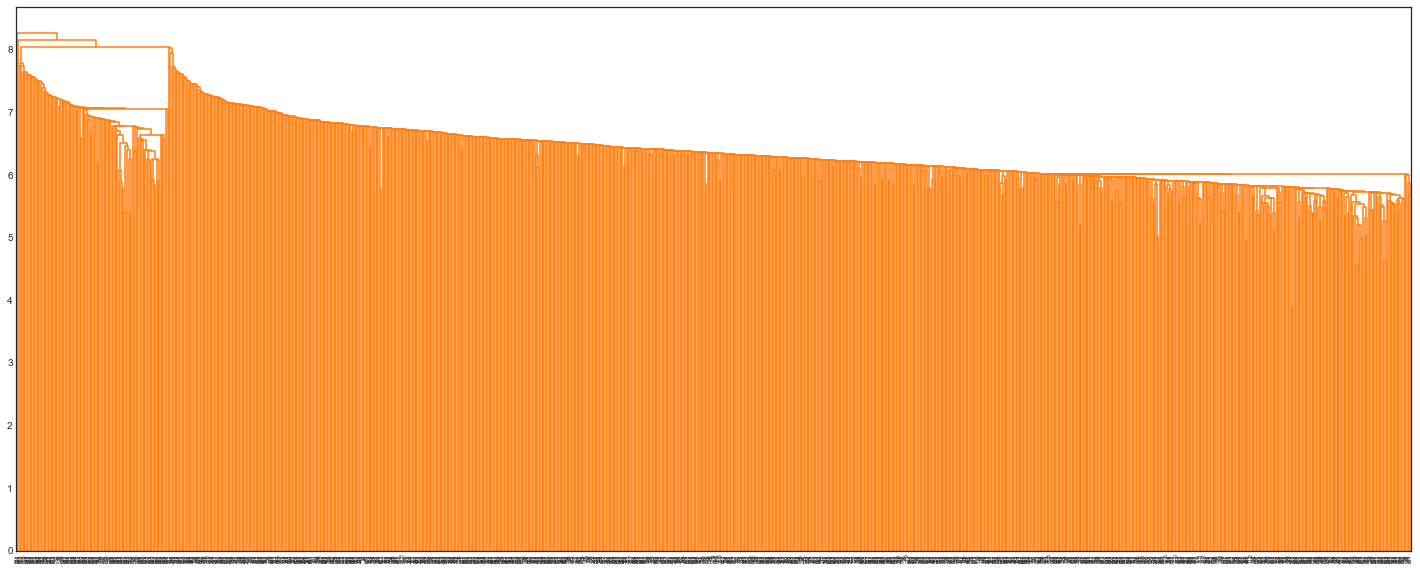

In [6]:
Z = linkage(gene_df, 'single')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)
plt.show()

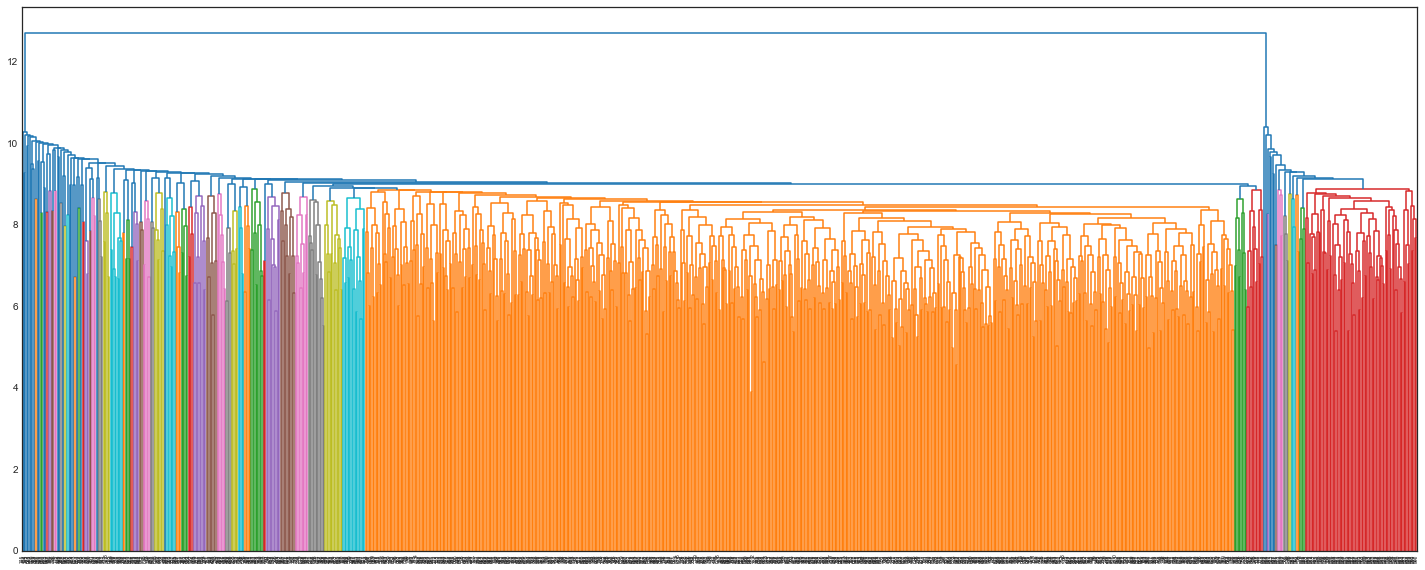

In [7]:
Z2 = linkage(gene_df, 'average')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z2)
plt.show()

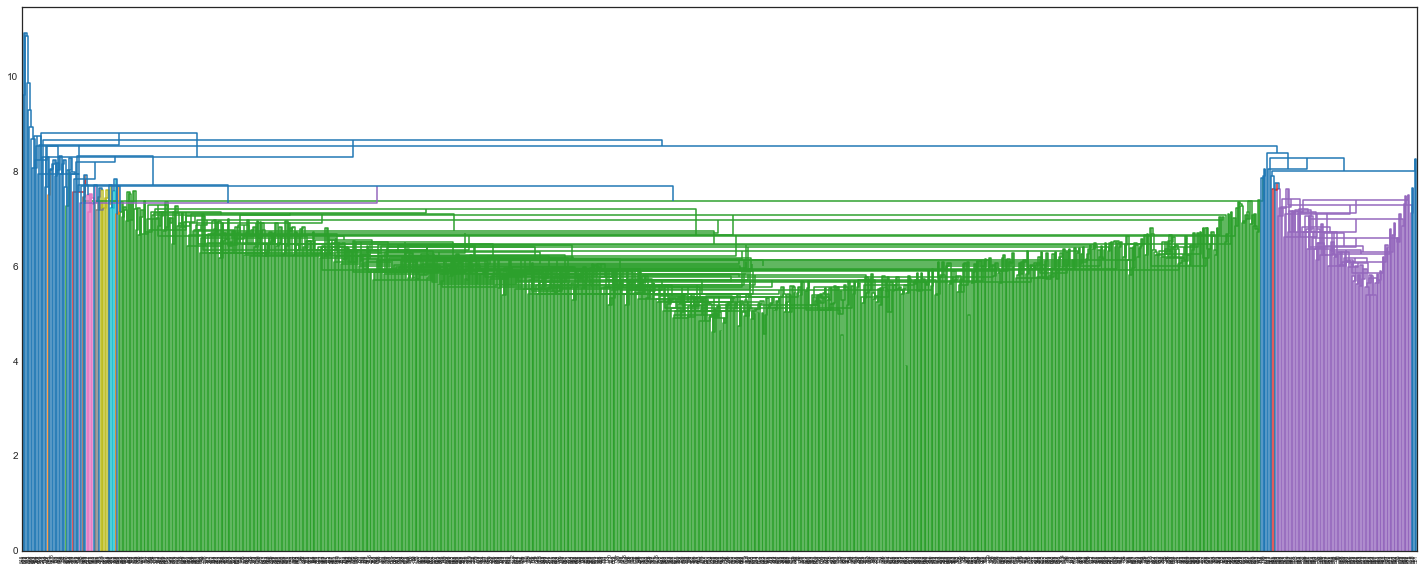

In [8]:
Z3 = linkage(gene_df, 'median')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z3)
plt.show()

These results are uniterpretable, I will transpose the gene dataframe

In [10]:
gene_df2 = gene_df.T
print(gene_df2.head())

        0         1         2         3         4         5         6    \
0 -0.961933 -0.292526  0.258788 -1.152132  0.195783  0.030124  0.085418   
1  0.441803 -1.139267 -0.972845 -2.213168  0.593306 -0.691014 -1.113054   
2 -0.975005  0.195837  0.588486 -0.861525  0.282992 -0.403426 -0.677969   
3  1.417504 -1.281121 -0.800258  0.630925  0.247147 -0.729859 -0.562929   
4  0.818815 -0.251439 -1.820398  0.951772  1.978668 -0.364099  0.938194   

        7         8         9    ...       990       991       992       993  \
0  1.116610 -1.218857  1.267369  ...  1.325041 -0.116171 -1.470146 -0.379272   
1  1.341700 -1.277279 -0.918349  ...  0.740838 -0.162392 -0.633375 -0.895521   
2  0.103278 -0.558925 -1.253500  ... -0.435533 -0.235912  1.446660 -1.127459   
3  0.390963 -1.344493 -1.067114  ... -3.065529  1.597294  0.737478 -0.631248   
4 -1.927491  1.159115 -0.240638  ... -2.378938 -0.086946 -0.122342  1.418029   

        994       995       996       997       998       999  
0 -1

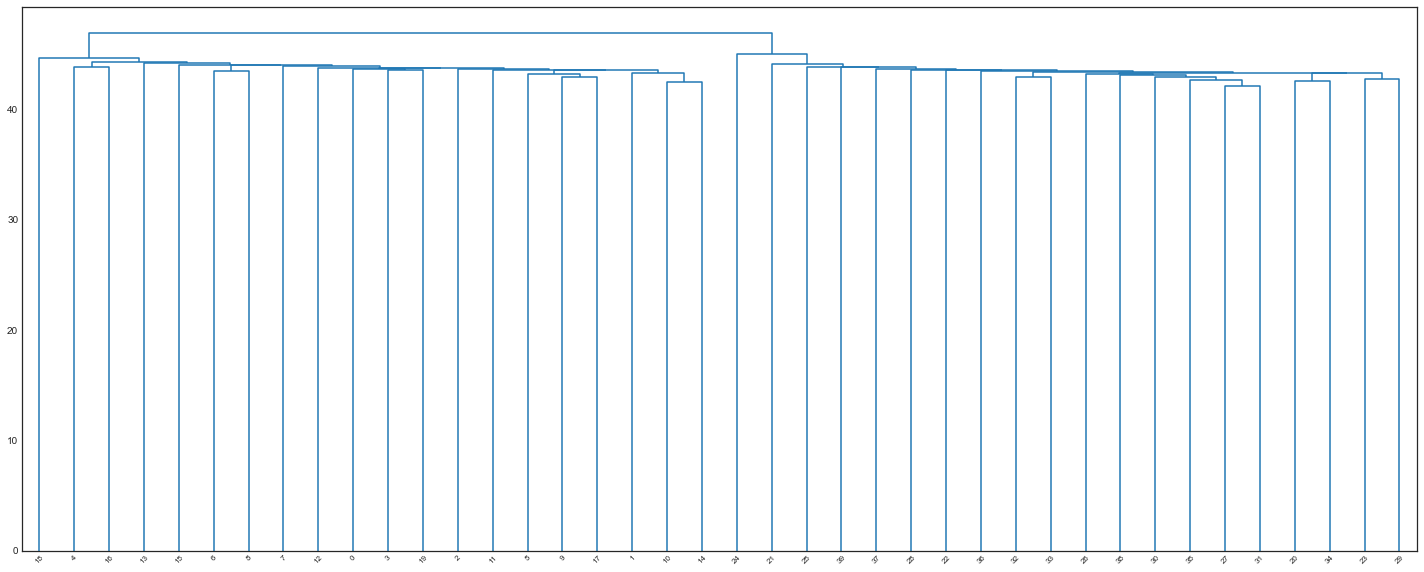

In [11]:
Z = linkage(gene_df2, 'single')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)
plt.show()

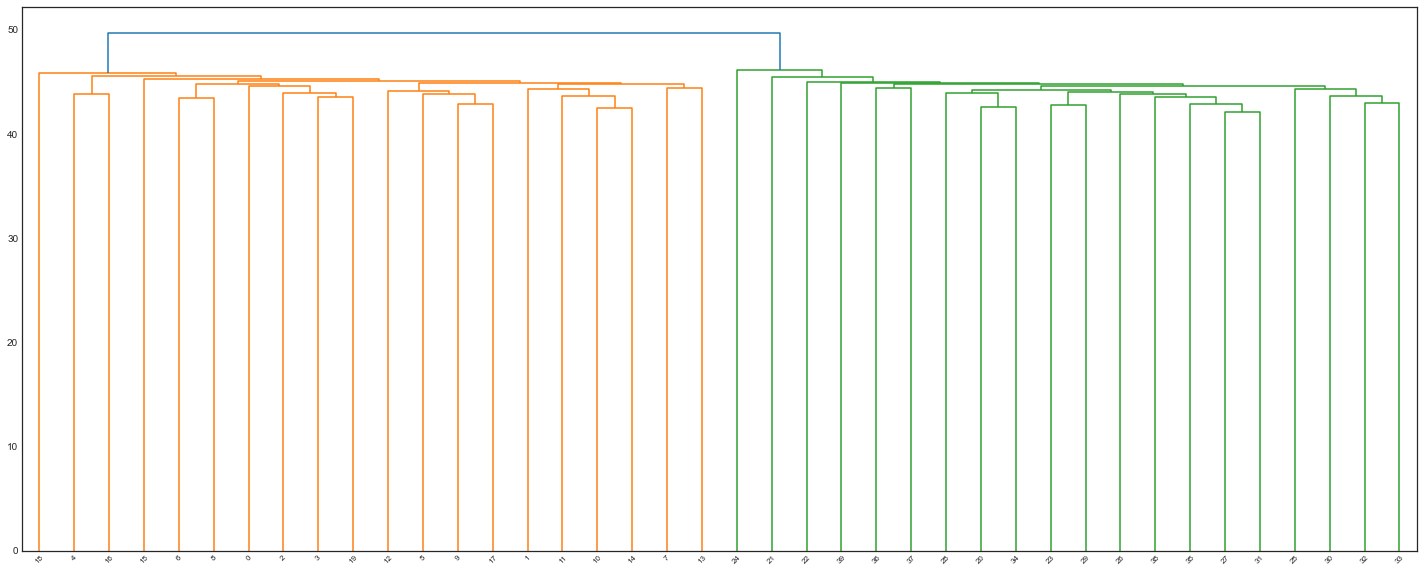

In [17]:
Z2 = linkage(gene_df2, 'average')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z2, color_threshold = 49)
plt.show()

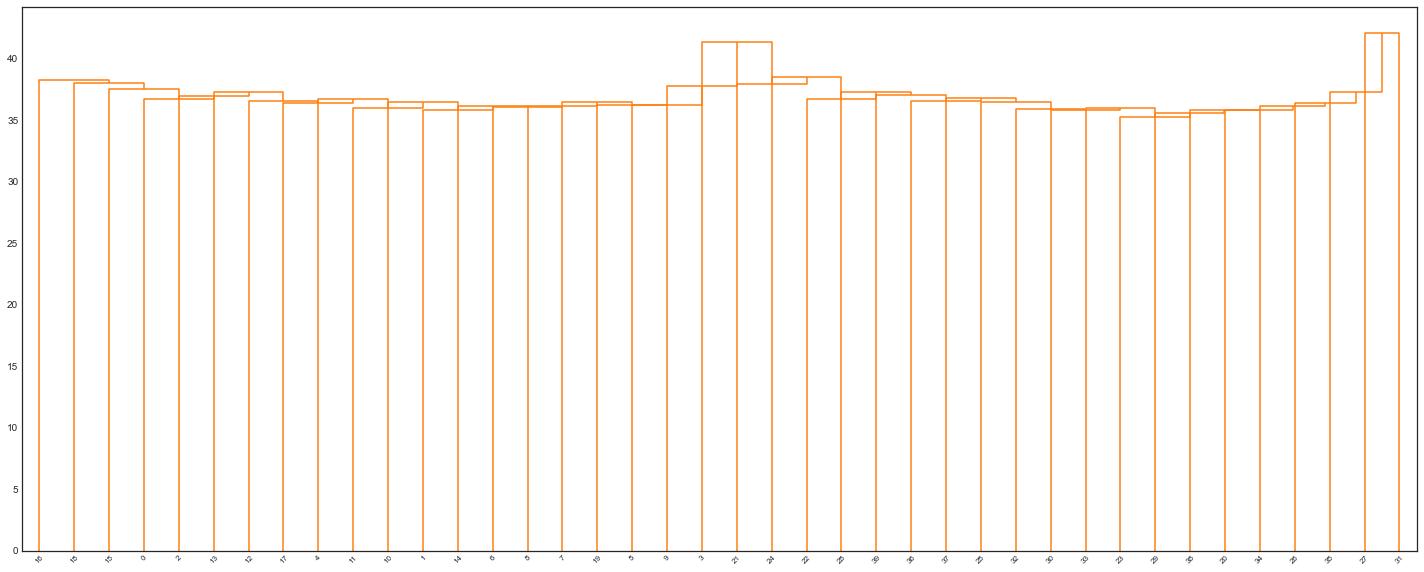

In [14]:
Z3 = linkage(gene_df2, 'median')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z3, color_threshold=49)
plt.show()

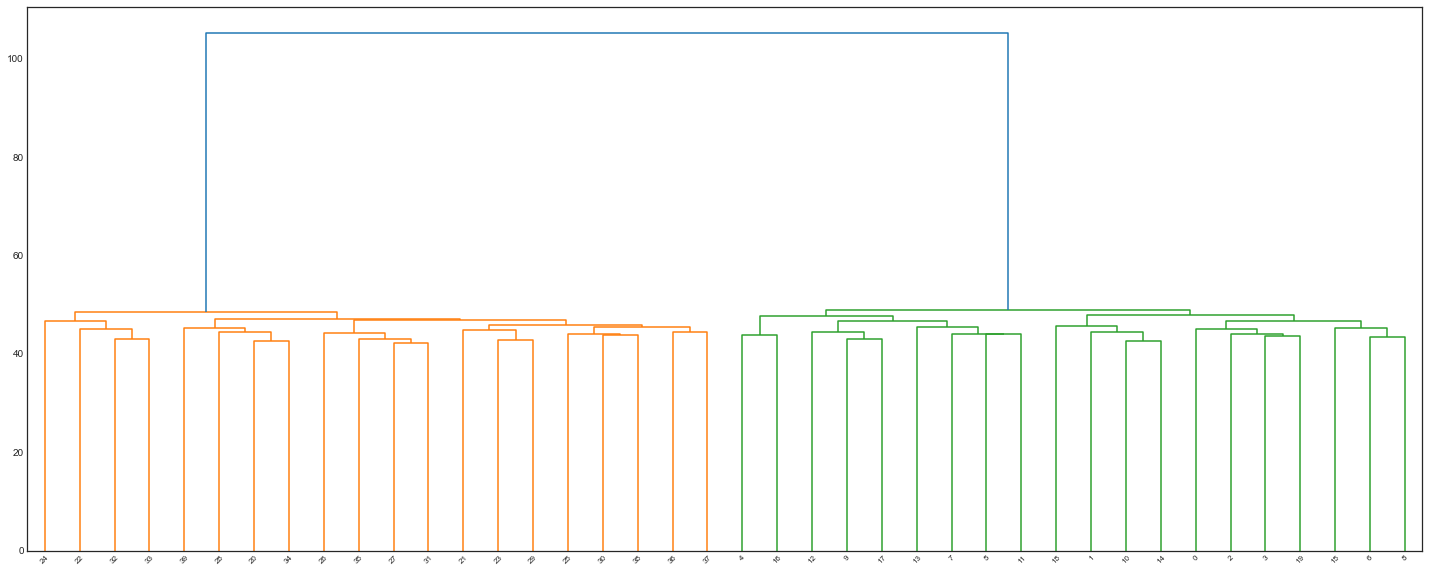

In [21]:
Z4= linkage(gene_df2, 'ward')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z4)
plt.show()

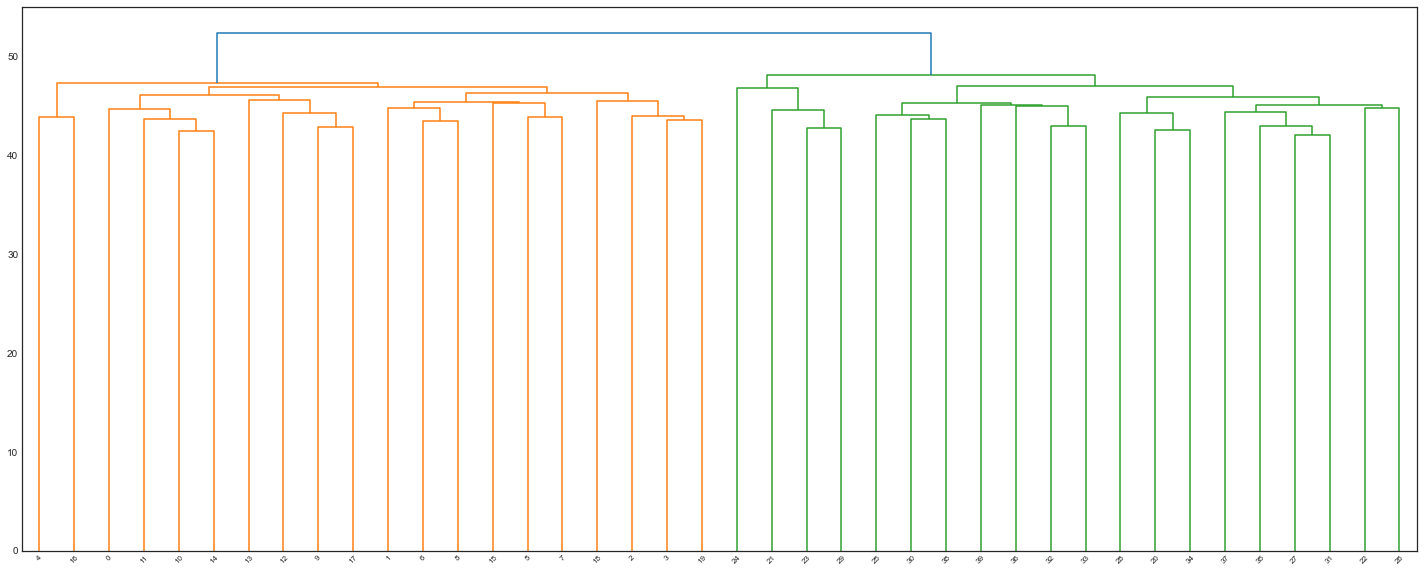

In [25]:
Z5 = linkage(gene_df2, 'complete')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z5,color_threshold=49)
plt.show()

It appears that most linkage methods do seperate the genes into two groups. 

### (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

Perhaps we can implement principal component analysis. 

In [40]:
pca_gene = PCA(n_components=40)
principalComponents = pca.fit(gene_df)
# df_pca_gene = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])
# df_pca['labels'] = gene_df2[[1000]]
# df_pca.labels = df_pca.labels.astype(int)

In [32]:
print(df_pca_gene)

          PC1       PC2
0   -0.710111  1.500916
1   -1.996702  0.919699
2   -0.687877 -0.097571
3   -0.819339 -0.237505
4   -1.487670 -0.852413
..        ...       ...
995 -1.219219 -0.478483
996 -1.738598  0.911842
997 -1.278861  0.154493
998 -1.665885 -1.599883
999 -2.187426 -0.626747

[1000 rows x 2 columns]


In [41]:
print(principalComponents.explained_variance_ratio_)

[0.18699299 0.02995022]
